In [1]:
import pandas as pd
import numpy as np
games=pd.read_csv('games_modified.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             16598 non-null  int64  
 1   Name             16598 non-null  object 
 2   Platform         16598 non-null  object 
 3   Year             16598 non-null  int64  
 4   Genre            16598 non-null  object 
 5   Publisher        16540 non-null  object 
 6   NA_Sales         16598 non-null  float64
 7   EU_Sales         16598 non-null  float64
 8   JP_Sales         16598 non-null  float64
 9   Other_Sales      16598 non-null  float64
 10  Global_Sales     16598 non-null  float64
 11  NA_SaleGroup     16598 non-null  int64  
 12  EU_SaleGroup     16598 non-null  int64  
 13  JP_SaleGroup     16598 non-null  int64  
 14  Other_SaleGroup  16598 non-null  int64  
dtypes: float64(5), int64(6), object(4)
memory usage: 1.9+ MB


In [2]:
games.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  NA_SaleGroup  \
0     41.49     29.02      3.77         8.46         82.74             1   
1     29.08      3.58      6.81         0.77         40.24             1   
2     15.85     12.88      3.79         3.31         35.82             2   
3     15.75     11.01      3.28         2.96         33.00             2   
4     11.27      8.89     10.22         1.00         31.37             2   

   EU_SaleGroup  JP_SaleGroup  Other_SaleGroup  
0             1             2                1  
1             2             1                3  
2             1             2                2  
3             1             2                2  
4             2             1                2

## World Cloud

## Top 50 Games in Japan

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop= stop+['5','2','ii','iii']


games['Name']=games['Name'].str.lower()
games['splitted_name']=games['Name'].str.split()
games['splitted_name'] = games["splitted_name"].apply(lambda x:[item for item in x if item not in stop])
games['splitted_name']= games.splitted_name.apply(lambda x: ' '.join(x))


In [7]:
games['splitted_name']

0                                          wii sports
1                                   super mario bros.
2                                      mario kart wii
3                                   wii sports resort
4                            pokemon red/pokemon blue
                             ...                     
16593                   woody woodpecker crazy castle
16594                      men black ii: alien escape
16595    score international baja 1000: official game
16596                                            know
16597                                spirits & spells
Name: splitted_name, Length: 16598, dtype: object

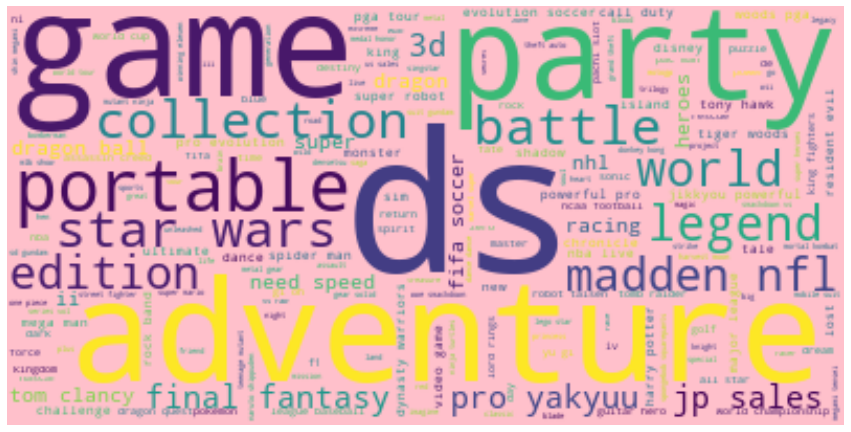

In [8]:
wordcloud = WordCloud(background_color="pink").generate(" ".join(games['splitted_name']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

## Top 50 Games in Global

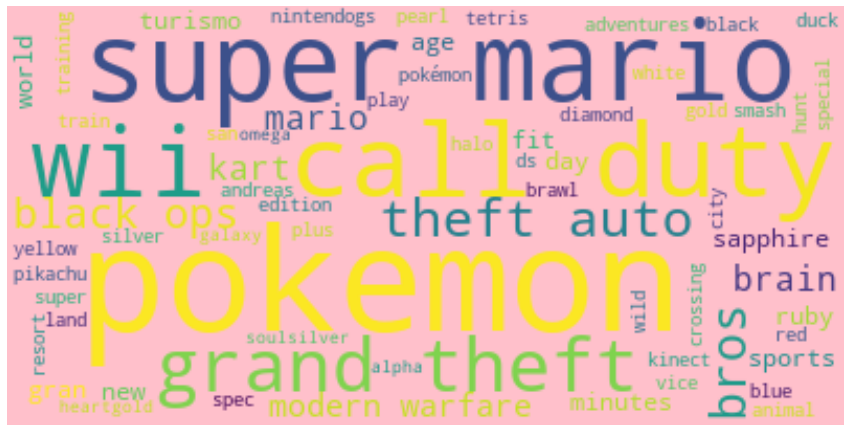

In [16]:
fifty_global=games.sort_values(by=['Global_Sales'],ascending=False).head(50)

fifty_global['Name']=fifty_global['Name'].str.lower()
fifty_global['splitted_name']=fifty_global['Name'].str.split()
fifty_global['splitted_name'] = fifty_global["splitted_name"].apply(lambda x:[item for item in x if item not in stop])
fifty_global['splitted_name']= fifty_global.splitted_name.apply(lambda x: ' '.join(x))

wordcloud = WordCloud(background_color="pink").generate(" ".join(fifty_global['splitted_name']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

## Top 50 Games in Europe

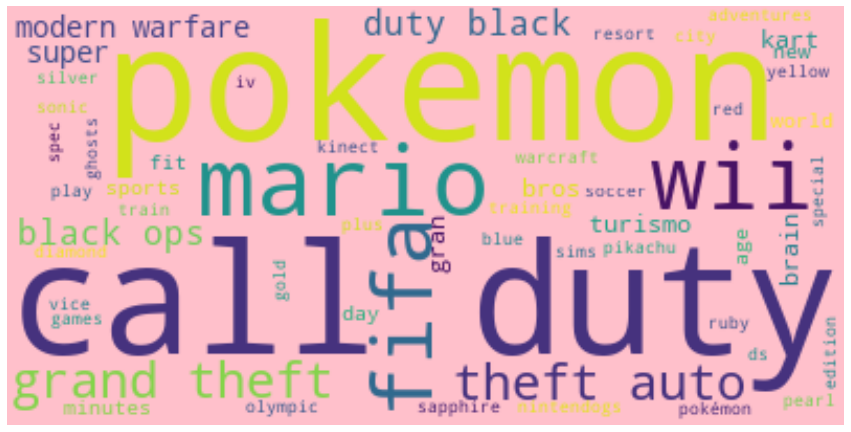

In [17]:
fifty_europe=games.sort_values(by=['EU_Sales'],ascending=False).head(50)

fifty_europe['Name']=fifty_europe['Name'].str.lower()
fifty_europe['splitted_name']=fifty_europe['Name'].str.split()
fifty_europe['splitted_name'] = fifty_europe["splitted_name"].apply(lambda x:[item for item in x if item not in stop])
fifty_europe['splitted_name']= fifty_europe.splitted_name.apply(lambda x: ' '.join(x))

wordcloud = WordCloud(background_color="pink").generate(" ".join(fifty_europe['splitted_name']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

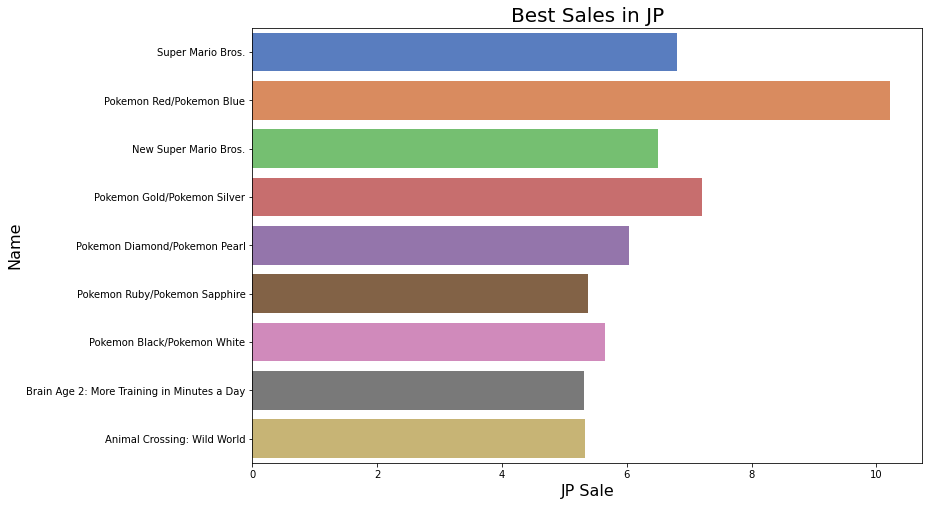

In [10]:
best_sales_jp=games[games['JP_SaleGroup']==1]
x=best_sales_jp["JP_Sales"]
y=best_sales_jp["Name"]

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_xlabel(xlabel='JP Sale', fontsize=16)
ax.set_ylabel(ylabel='Name', fontsize=16)
ax.set_title(label='Best Sales in JP', fontsize=20)
plt.show();

In [6]:
games["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
companies={'Wii' : 'Nintendo',
           'NES' : 'Nintendo',
           'DS'  : 'Nintendo',
           'SNES': 'Nintendo',
           '3DS' : 'Nintendo',
           'N64' : 'Nintendo',
           'GC'  : 'Nintendo',
           'WiiU': 'Nintendo',
           'GB'  : 'Game Boys',
           'GBA' : 'Game Boys',
           'X360': 'Microsoft',
           'XB'  : 'Microsoft',
           'XOne': 'Microsoft',
           'PS3' : 'SONY',
           'PS2' : 'SONY',
           'PS4' : 'SONY',
           'PS'  : 'SONY',
           'PSP' : 'SONY',
           'PSV' : 'SONY',
           '2600':'Atari',
           'TG16':'NEC',
           'PCFX':'NEC'
          }
def get_company(platform):
    if platform in companies:
        return companies[platform]
    else:
        return platform

games['Company']=games['Platform'].apply(get_company)

In [12]:
games.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  NA_SaleGroup  \
0     41.49     29.02      3.77         8.46         82.74             1   
1     29.08      3.58      6.81         0.77         40.24             1   
2     15.85     12.88      3.79         3.31         35.82             2   
3     15.75     11.01      3.28         2.96         33.00             2   
4     11.27      8.89     10.22         1.00         31.37             2   

   EU_SaleGroup  JP_SaleGroup  Other_SaleGroup    Company  
0             1             2                1   Nintendo  
1             2             1                3   Nintendo  
2             1             2                2   Nintendo  
3             1             2                2   Nintendo  
4             2             1                2  Game Boys

In [13]:
import numpy as np
games_by_year=games[games["Year"]!=0]
games_year_sale=games_by_year.groupby(['Company','Year'])['Global_Sales'].sum().reset_index()
games_year_sale

Company  Year  Global_Sales
0       3DO  1994          0.02
1       3DO  1995          0.08
2     Atari  1980         11.38
3     Atari  1981         35.77
4     Atari  1982         28.86
..      ...   ...           ...
158    SONY  2016         45.24
159    SONY  2017          0.05
160      WS  1999          0.46
161      WS  2000          0.68
162      WS  2001          0.28

[163 rows x 3 columns]

In [14]:
import seaborn as sns
import plotly.express as px
fig=px.line(games_year_sale,x="Year",y="Global_Sales",color="Company")
fig.show()

In [15]:
group_genre=games.groupby('Genre').agg({'Global_Sales':['mean','sum'],'EU_Sales':['max','sum']})
group_genre

Global_Sales          EU_Sales        
                     mean      sum      max     sum
Genre                                              
Action           0.528100  1751.18     9.27  525.00
Adventure        0.185879   239.04     2.79   64.13
Fighting         0.529375   448.91     2.61  101.32
Misc             0.465762   809.96     9.26  215.98
Platform         0.938341   831.37     9.23  201.63
Puzzle           0.420876   244.95     5.36   50.78
Racing           0.586101   732.04    12.88  238.39
Role-Playing     0.623233   927.37     8.89  188.06
Shooter          0.791885  1037.37     5.88  313.27
Simulation       0.452364   392.20    11.00  113.38
Sports           0.567319  1330.93    29.02  376.85
Strategy         0.257151   175.12     2.27   45.34

In [17]:
jp_count=games.groupby('JP_SaleGroup').count()['Rank']
eu_count=games.groupby('EU_SaleGroup').count()['Rank']


JP_SaleGroup
1        9
2      233
3    16356
Name: Rank, dtype: int64